# Exploratory Data Analysis 

In [115]:
#import required libraries
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
# for Box-Cox Transformation
from scipy import stats
%matplotlib inline
import seaborn as sb




In [116]:
from sklearn.preprocessing import MinMaxScaler


In [117]:
#Loading and reading the dataset
df=pd.read_csv('conversion_data.csv')

In [118]:
#Validate the shape of the dataframe
df.shape

(316200, 6)

In [119]:
#Columns of Dataframe
df.columns

Index([u'country', u'age', u'new_user', u'source', u'total_pages_visited',
       u'converted'],
      dtype='object')

In [120]:
#sneak peek into dataframe
df.sample(3)

,country,age,new_user,source,total_pages_visited,converted
259349,US,20,1,Seo,6,0
183226,US,43,1,Seo,3,0
69407,China,47,0,Seo,1,0


In [121]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [122]:
#summary of dataset
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [123]:
#convert affairs columns to 0 and 1
df['converted'] = np.where(df['converted']<=0, 0, 1)

In [124]:
#validate the updated affairs column
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

# Data Exploration

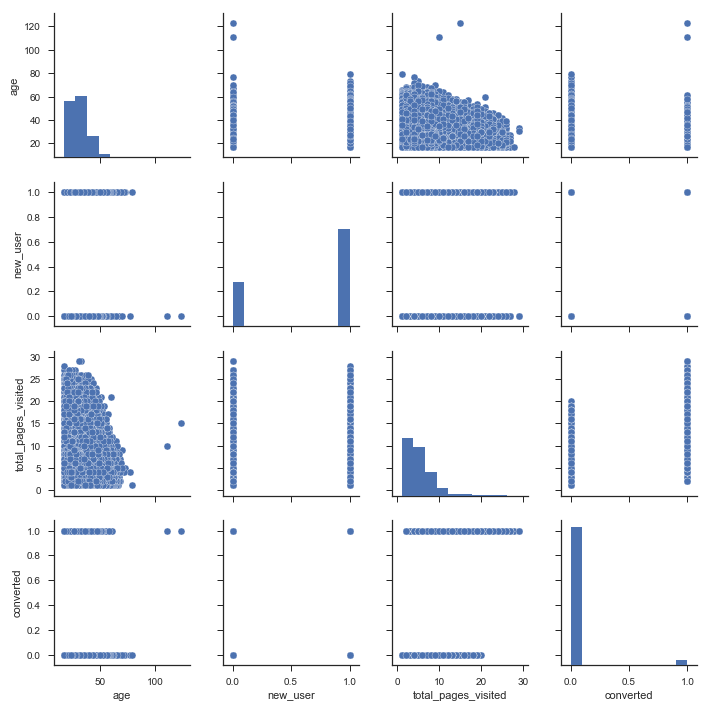

In [125]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)



In [126]:
#groupby Conversion 
df.groupby('converted').mean()

,age,new_user,total_pages_visited
converted,,,
0,30.703961,0.698382,4.550281
1,26.546765,0.297941,14.553529


# 1. More page views infer more chances of conversion 


# 2. New users have less chances of conversion than returning users

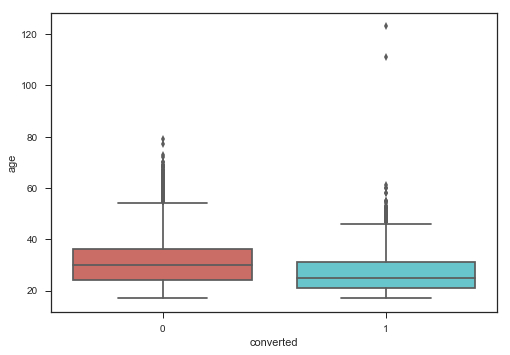

In [127]:
sb.boxplot(x='converted', y='age', data=df, palette='hls')

# Mean age of people who converted are younger than not converted 
See Above:

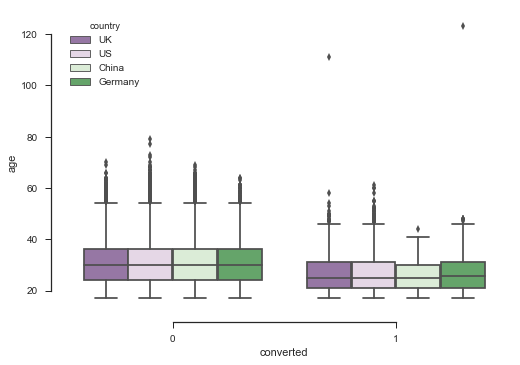

In [128]:
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="converted", y="age", hue="country", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

In [129]:
#show all the plots in the current notebook
%matplotlib inline

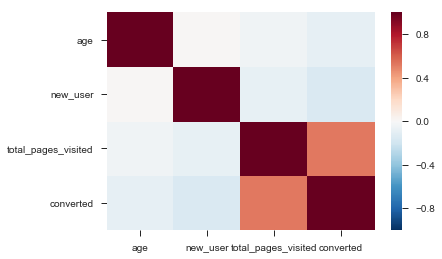

In [130]:
sb.heatmap(df.corr()) 

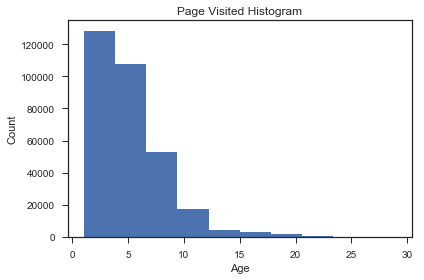

In [131]:
#Histograms
plt.hist(df.total_pages_visited)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Page Visited Histogram')
plt.tight_layout()
plt.show()

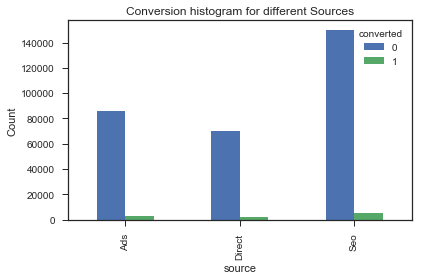

In [132]:
#Combined plots (marriage ratings and affair status)in absolute terms 
pd.crosstab(df.source,df.converted).plot(kind='bar')
plt.xlabel('source')
plt.ylabel('Count')
plt.title('Conversion histogram for different Sources')
plt.tight_layout()
plt.show()

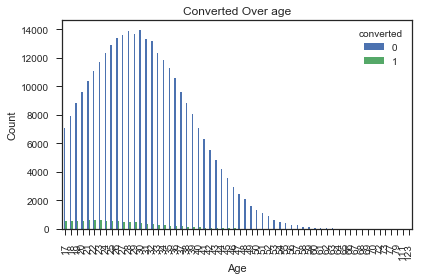

In [133]:
#Combined plots (years of marriage and affair status)in absolute terms 
pd.crosstab(df.age,df.converted).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Converted Over age')
plt.tight_layout()
plt.show()

In [134]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Data Preperation

In [135]:
#Datapreperation for Running the logistic regression model
df.columns
df.shape

(316200, 6)

## Dummy variables for categorical variables 

In [136]:
df_new=pd.get_dummies(data=df, columns=['country', 'source'])

In [137]:
print(len(df.columns))
print(len(df_new.columns))

6
11


In [138]:
#Shape of new dataframe
df_new.shape

(316200, 11)

In [139]:
df_new.head(2)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1


In [158]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [159]:
#create input dataset without including target variable( converted column)
X=df_new.loc[:, df_new.columns != ('converted', 'total_pages_visited')]



In [160]:
#Validate the shape of input data X
X.shape

(316200, 11)

In [161]:
#Create the new data with only target column
y=df_new['converted']

In [162]:
y.shape

(316200L,)

In [163]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)


In [164]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(221340, 11)
(221340L,)
(94860, 11)
(94860L,)


In [165]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

7140
3060


## Build the classification model

In [166]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

In [167]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

1.0

In [168]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

## Results 

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Converted", "Not converted"]))

               precision    recall  f1-score   support

    Converted       1.00      1.00      1.00     91800
Not converted       1.00      1.00      1.00      3060

  avg / total       1.00      1.00      1.00     94860



In [170]:
from sklearn.metrics import roc_auc_score
#AUC score
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(logreg_auc))

AUC for Logistic Regression: 1.000


## Hyperparameter tunning

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
#fit the model
log_model=LogisticRegression()

In [155]:
#create parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 15,20,100]}

In [156]:
#Run grid search algorithm
grid_search = GridSearchCV(log_model, param_grid, cv=5)

In [49]:
#Fit the model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
#validate the new score of model
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.99


### Best Parameters 

In [47]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.99


In [50]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## Change the probability threshold

In [51]:
#Alter the threshold
y_pred_lower_threshold = logreg.predict_proba(X_test)[:,1] >.3

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.90      0.95     91800
          1       0.25      0.97      0.40      3060

avg / total       0.97      0.90      0.93     94860

